In [1]:
!set "KERAS_BACKEND=tensorflow"

%load_ext autoreload

%autoreload 2


import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras; import keras.backend
if keras.backend.backend() != 'tensorflow':
    raise BaseException("This script uses other backend")
else:
    keras.backend.set_image_dim_ordering('tf')
    print("Backend ok")

import cv2
import numpy as np
from sklearn.metrics import classification_report
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import os
from sklearn.preprocessing import normalize


import models_elisa


Using TensorFlow backend.


Backend ok


In [2]:
def clean_data_labels_pre(orig):
    index1 = orig["totIndPositiveG"]==1
    index2 = orig["totIndNegativeG"]==1
    index3 = orig["totIndNeutralG"]==1
    
    idx = index1 & index2 & index3
    orig.loc[idx,"totIndPositiveG"] = 0

    orig.loc[idx,"totIndNegativeG"] = 0

    orig.loc[idx,"totIndNeutralG"] = 1

    index1 = orig["totIndPositiveG"]==1
    index2 = orig["totIndNegativeG"]==0
    index3 = orig["totIndNeutralG"]==1
    
    idx = index1 & index2 & index3
    orig.loc[idx,"totIndPositiveG"] = 1

    orig.loc[idx,"totIndNegativeG"] = 0

    orig.loc[idx,"totIndNeutralG"] = 0

    
    index1 = orig["totIndPositiveG"]==0
    index2 = orig["totIndNegativeG"]==1
    index3 = orig["totIndNeutralG"]==1
    
    idx = index1 & index2 & index3
    orig.loc[idx,"totIndPositiveG"] = 0

    orig.loc[idx,"totIndNegativeG"] = 1

    orig.loc[idx,"totIndNeutralG"] = 0
    

    index1 = orig["totIndPositiveG"]==1
    index2 = orig["totIndNegativeG"]==1
    index3 = orig["totIndNeutralG"]==0

    idx = index1 & index2 & index3
    orig.loc[idx,"totIndPositiveG"] = 0
    orig.loc[idx,"totIndNegativeG"] = 0
    orig.loc[idx,"totIndNeutralG"] = 1
    
    
    index1 = orig["totIndPositiveG"]==0
    index2 = orig["totIndNegativeG"]==0
    index3 = orig["totIndNeutralG"]==0

    idx = index1 & index2 & index3
    orig.loc[idx,"totIndPositiveG"] = 0
    orig.loc[idx,"totIndNegativeG"] = 0
    orig.loc[idx,"totIndNeutralG"] = 1
    
    return orig

def clean_data_labels_post(orig):
    index1 = orig[0]==1
    index2 = orig[1]==1
    index3 = orig[2]==1

    idx = index1 & index2 & index3
    orig.loc[idx,0] = 0

    orig.loc[idx,1] = 0

    orig.loc[idx,2] = 1


    index1 = orig[0]==1
    index2 = orig[1]==0
    index3 = orig[2]==1

    idx = index1 & index2 & index3
    orig.loc[idx,0] = 1

    orig.loc[idx,1] = 0

    orig.loc[idx,2] = 0

    index1 = orig[0]==0
    index2 = orig[1]==1
    index3 = orig[2]==1

    idx = index1 & index2 & index3
    orig.loc[idx,0] = 0

    orig.loc[idx,1] = 1

    orig.loc[idx,2] = 0

    
    index1 = orig[0]==1
    index2 = orig[1]==1
    index3 = orig[2]==0

    idx = index1 & index2 & index3
    orig.loc[idx,0] = 0
    orig.loc[idx,1] = 0
    orig.loc[idx,2] = 1
    
    
    index1 = orig[0]==0
    index2 = orig[1]==0
    index3 = orig[2]==0

    idx = index1 & index2 & index3
    orig.loc[idx,0] = 0
    orig.loc[idx,1] = 0
    orig.loc[idx,2] = 1
    
    return orig

In [3]:
import pandas as pd

feature_start = 3
feature_end= 14

#was union_voting.csv before.
#labelling = pd.read_csv("totGroupByNewLabels.csv")
labelling = pd.read_csv("union_voting_elisa.csv")


#print(labelling.head())

data = []
labels = []

files = labelling["filename"]

labels_ind = labelling.iloc[:,feature_start:feature_end]

lab=labels_ind #clean_data_labels_pre(labels_ind)

#lab.head()

labelling.iloc[:,feature_start:feature_end] = lab
lab.head()

labelling.head()

,Unnamed: 0,filename,timestamp,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
0,0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,0,1,0,1,1,1,1,0,0,0,0
1,1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,0,1,0,0,0,1,0,1,0,1,0
2,2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,0,0,0,0,0,0,0,0,0,1,0
3,3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,0,0,0,0,0,0,1,0,0,1,1
4,4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,0,1,1,0,1,0,0,0,0,1,0


In [4]:
#normalizing labels instead
#from sklearn.preprocessing import RobustScaler

#lab = MinMaxScaler().fit_transform(lab)

labelling.iloc[:,feature_start:feature_end] = lab

labelling.head(20)

,Unnamed: 0,filename,timestamp,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
0,0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,0,1,0,1,1,1,1,0,0,0,0
1,1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,0,1,0,0,0,1,0,1,0,1,0
2,2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,0,0,0,0,0,0,0,0,0,1,0
3,3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,0,0,0,0,0,0,1,0,0,1,1
4,4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,0,1,1,0,1,0,0,0,0,1,0
5,5,20151021q3iberdrola_f000154.mp3,2018-07-25 03:02:37,0,0,1,1,1,0,0,0,0,1,1
6,6,20151021q3iberdrola_f000155.mp3,2018-07-25 03:02:48,0,1,1,1,0,0,1,0,0,1,0
7,7,20151021q3iberdrola_f000156.mp3,2018-07-25 03:03:04,0,0,0,1,1,0,0,0,1,1,0
8,8,20151021q3iberdrola_f000157.mp3,2018-07-25 03:03:38,0,1,1,1,0,0,0,0,0,1,1
9,9,20151021q3iberdrola_f000158.mp3,2018-07-25 03:03:50,1,0,1,1,0,0,0,0,0,1,1


In [5]:
for i in range(0,len(files)):
    try:
        file_name="./Spectrograms_10K/"+files.iloc[i]+".png"
        #print(file_name)
        image = cv2.imread(file_name)
        image= cv2.resize(image,(300,150))
        image = image/255 #between 0 and 1
        data.append(image)
        #multi-class
        #labels.append(labelling.iloc[i,-1])
        #multi-label
        labels.append(labelling.iloc[i,feature_start:feature_end].get_values())
    except:
        del files.iloc[i]
        continue

In [6]:
labels

[array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=object),
 array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=object),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=object),
 array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=object),
 array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=object),
 array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=object),
 array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=object),
 array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=object),
 array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=object),
 array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=object),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object),
 array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=object),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=object),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=object),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=object),
 array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=object),
 array([0, 1, 1, 0, 0, 0, 0, 0,

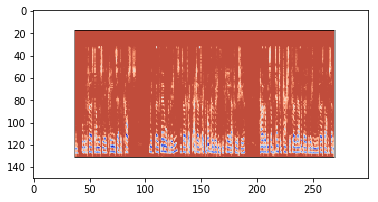

7091


In [9]:
import matplotlib.pyplot as plt


plt.imshow(data[1300])
plt.show()

labelling.head()

print(len(files))

#labels

In [7]:
    
from sklearn.model_selection import train_test_split


#train, test, train_l, test_l= train_test_split(data,pd.DataFrame(labels),test_size=0.33, random_state=42)


train_validate, test, train_l_validate, test_l= train_test_split(data,pd.DataFrame(labels),test_size=0.33, random_state=42)

train, validate, train_l, validate_l= train_test_split(train_validate,train_l_validate,test_size=0.1, random_state=42)


In [ ]:
len(train)

In [8]:
import numpy as np

X_train = np.array(train).reshape(-1,300,150,3)
X_validate = np.array(validate).reshape(-1,300,150,3) # I need validate to find the threeshold.
X_test = np.array(test).reshape(-1,300,150,3)

print(np.shape(X_train))

(4275, 300, 150, 3)


In [11]:
train = None
test= None

print(np.shape(X_train))

(4275, 300, 150, 3)


In [38]:
import models_elisa

model=models_elisa.small_vgg(150,300,3,11,params=[16,32,32,32], stride=5) #this creates a feature extractor for VGG...

#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 300, 150, 16)      1216      
_________________________________________________________________
activation_8 (Activation)    (None, 300, 150, 16)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 300, 150, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 75, 16)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 150, 75, 16)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 75, 32)       12832     
_________________________________________________________________
activation_9 (Activation)    (None, 150, 75, 32)       0         
__________

In [13]:
X_train[0]

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,

In [58]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.callbacks import LambdaCallback
from keras import optimizers

#Binary crossentropy: this is a multi-label classification problem

opt = optimizers.Adam(lr=0.0001)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.summary()

early_stop = EarlyStopping(monitor='val_loss', patience=10)
check_point = ModelCheckpoint('elisa_small_11_bce_final.npy', save_best_only=True)


train_data= None
train_labels=None
#train_data = np.append(X_train,X_validate, axis = 0)
#train_labels = np.append(train_l,validate_l, axis=0)

#before identifying thresshold on validation
model.fit(X_train, np.array(train_l), batch_size = 32, epochs=50, callbacks= [early_stop, check_point], validation_split=0.1) # validation_data=[X_validate]) #,validation_data=(X_test1,Y_test))
#model.fit(train_data, train_labels, batch_size = 32, epochs=5, callbacks= [early_stop, check_point], validation_split=0.1) # validation_data=[X_validate]) #,validation_data=(X_test1,Y_test))



Train on 3847 samples, validate on 428 samples
Epoch 1/50
3847/3847 [==============================] - 66s 17ms/step - loss: 0.4892 - acc: 0.7862 - val_loss: 0.4711 - val_acc: 0.7991
Epoch 2/50
3847/3847 [==============================] - 58s 15ms/step - loss: 0.4859 - acc: 0.7873 - val_loss: 0.4635 - val_acc: 0.7995
Epoch 3/50
3847/3847 [==============================] - 59s 15ms/step - loss: 0.4835 - acc: 0.7873 - val_loss: 0.4711 - val_acc: 0.7995
Epoch 4/50
3847/3847 [==============================] - 60s 16ms/step - loss: 0.4812 - acc: 0.7867 - val_loss: 0.4568 - val_acc: 0.7999
Epoch 5/50
3847/3847 [==============================] - 61s 16ms/step - loss: 0.4760 - acc: 0.7897 - val_loss: 0.4828 - val_acc: 0.7993
Epoch 6/50
3847/3847 [==============================] - 61s 16ms/step - loss: 0.4765 - acc: 0.7886 - val_loss: 0.4818 - val_acc: 0.7991
Epoch 7/50
2720/3847 [====================>.........] - ETA: 16s - loss: 0.4697 - acc: 0.7926

KeyboardInterrupt: 

In [17]:
len(test_l.iloc[:,2])

2328

In [59]:
model.load_weights("elisa_small_11_bce_final.npy")

In [60]:
predicted_labels=model.predict(X_test)
pr = [i.tolist() for i in predicted_labels]
pr_max = [np.argmax(i) for i in predicted_labels]
pr_round = [np.round(i) for i in predicted_labels]



my_test_l=np.array(test_l).tolist()

my_test_max = [np.argmax(i) for i in my_test_l]


original = pd.DataFrame(my_test_l)


predicted = pd.DataFrame(pr)

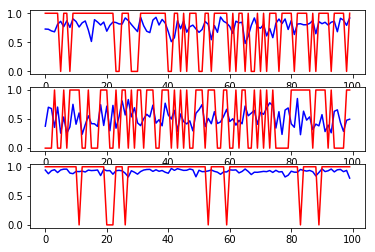

array([ 0.72838801,  0.72523516,  0.6964196 ,  0.68077689,  0.81079865,
        0.86178052,  0.76870143,  0.87034059,  0.75648677,  0.90389448,
        0.8581295 ,  0.76396418,  0.83574766,  0.86732358,  0.71261066,
        0.5151692 ,  0.88990355,  0.84924209,  0.7975598 ,  0.84889853,
        0.69176579,  0.7907151 ,  0.84870553,  0.84077322,  0.81665623,
        0.81552964,  0.91946226,  0.87447578,  0.80709499,  0.74493766,
        0.68553668,  0.93218821,  0.78551549,  0.69067669,  0.667642  ,
        0.88241929,  0.93049657,  0.79831868,  0.89392751,  0.83192134,
        0.68391949,  0.51223987,  0.58102143,  0.87329191,  0.73401338,
        0.86640513,  0.67525518,  0.76898372,  0.79595715,  0.73104006,
        0.67207831,  0.72072625,  0.85879403,  0.80900776,  0.54541659,
        0.78843874,  0.67229986,  0.93553317,  0.86197269,  0.83180434,
        0.77295566,  0.65508884,  0.86392444,  0.83553445,  0.84583414,
        0.48005226,  0.60659105,  0.79126132,  0.91951144,  0.76

In [202]:
import matplotlib.pyplot as plt

limit = 100

plt.subplot(3,1,1)
plt.plot(list(range(0,limit)),predicted_labels[0:limit,0], 'b')
plt.plot(list(range(0,limit)),np.array(test_l)[0:limit,0], 'r')


plt.subplot(3,1,2)
plt.plot(list(range(0,limit)),predicted_labels[0:limit,1], 'b')
plt.plot(list(range(0,limit)),np.array(test_l)[0:limit,1], 'r')


plt.subplot(3,1,3)

plt.plot(list(range(0,limit)),predicted_labels[0:limit,2], 'b')
plt.plot(list(range(0,limit)),np.array(test_l)[0:limit,2], 'r')


plt.show()

np.array(test_l)[0:limit,0]
predicted_labels[0:limit,0]

In [61]:
predicted_labels_v=model.predict(X_validate)
pr_v = [i.tolist() for i in predicted_labels_v]

my_validate_l=np.array(validate_l).tolist()

original_v = pd.DataFrame(my_validate_l)


predicted_v = pd.DataFrame(pr_v)

In [33]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


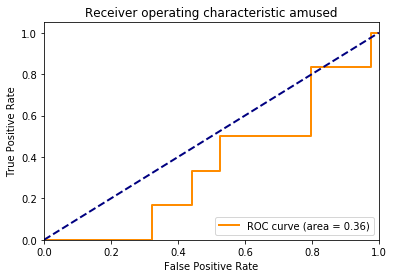

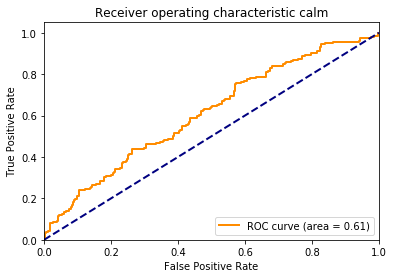

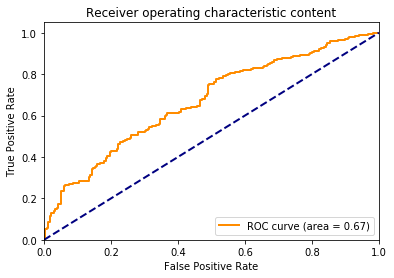

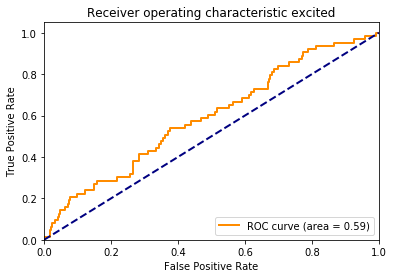

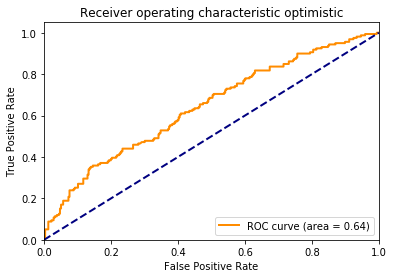

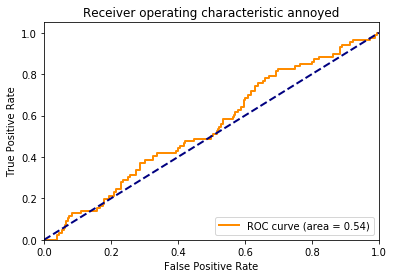

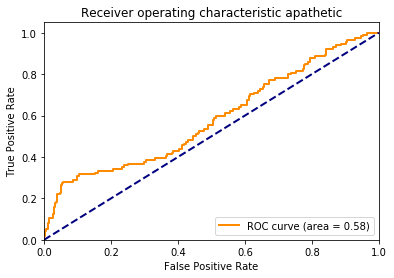

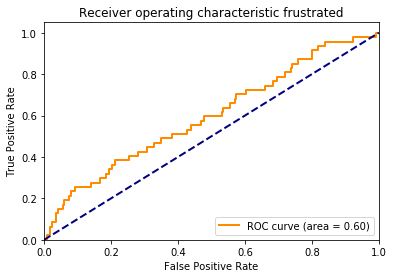

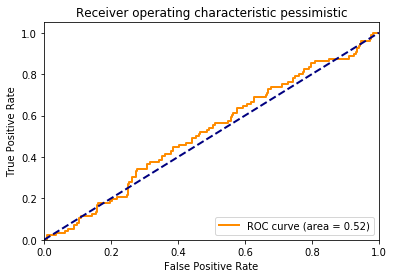

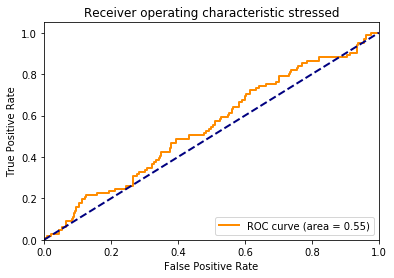

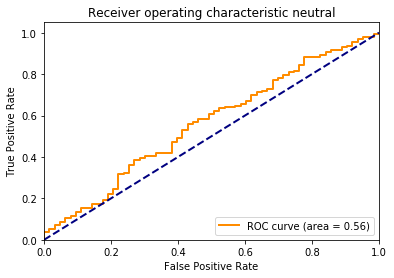

[0.052649993449449539, 0.26828080415725708, 0.29003441333770752, 0.14435943961143494, 0.28669834136962891, 0.10782142728567123, 0.14602121710777283, 0.079208120703697205, 0.12269972264766693, 0.099530883133411407, 0.91244196891784668]


In [62]:
# Validation, to select cutoff

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

cut_off_list=[]

names = ["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"]
#names = ["positive", "negative", "neutral"]


for i in range(0,len(names)):
    fpr[i], tpr[i], _ = roc_curve(original_v[:][i],predicted_v[:][i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    cut_off_list.append(Find_Optimal_Cutoff(original_v[:][i],predicted_v[:][i])[0])
    
cl = 0


for cl in range(0,len(names)):
    plt.figure()
    lw = 2
    plt.plot(fpr[cl], tpr[cl], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[cl])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + names[cl])# ROC curves
    plt.legend(loc="lower right")


plt.show()

print(cut_off_list)

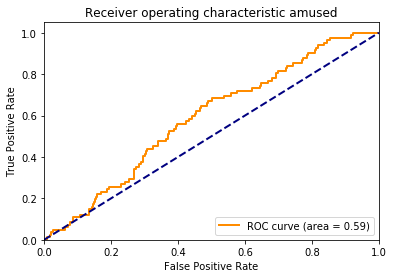

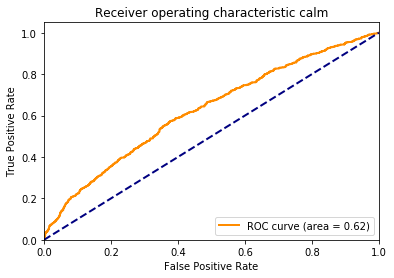

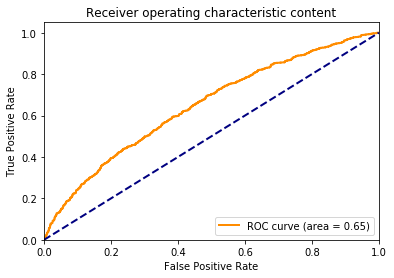

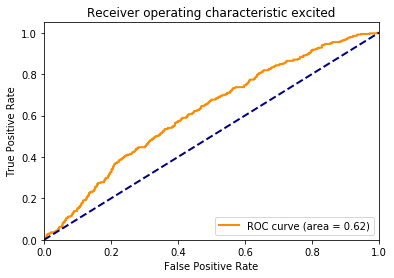

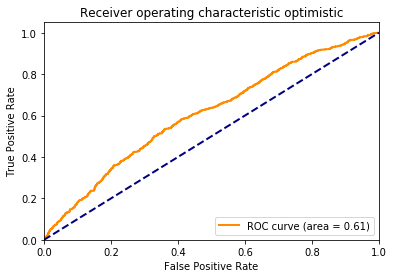

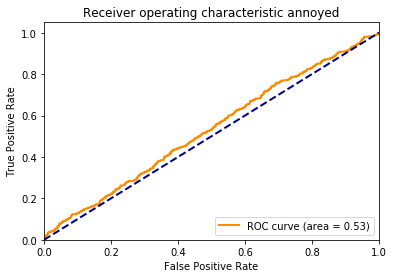

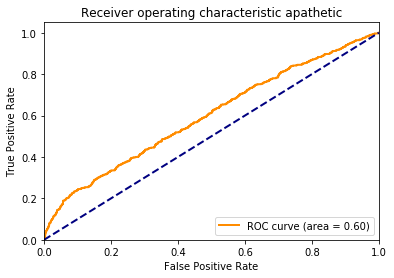

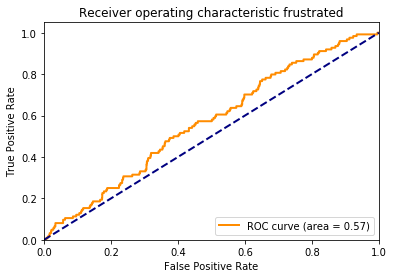

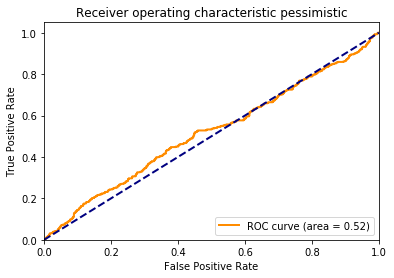

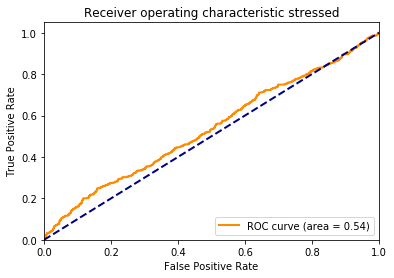

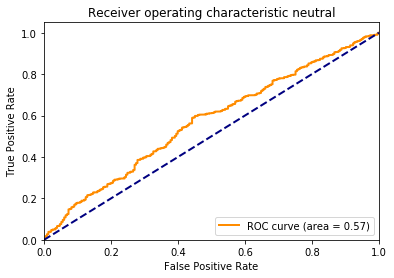

[0.052649993449449539, 0.26828080415725708, 0.29003441333770752, 0.14435943961143494, 0.28669834136962891, 0.10782142728567123, 0.14602121710777283, 0.079208120703697205, 0.12269972264766693, 0.099530883133411407, 0.91244196891784668]


In [63]:
# Testing to see actual Roc Curves


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


names = ["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"]
#names = ["positive", "negative", "neutral"]


for i in range(0,len(names)):
    fpr[i], tpr[i], _ = roc_curve(original[:][i],predicted[:][i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
cl = 0


for cl in range(0,len(names)):
    plt.figure()
    lw = 2
    plt.plot(fpr[cl], tpr[cl], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[cl])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + names[cl])# ROC curves
    plt.legend(loc="lower right")


plt.show()

print(cut_off_list)

In [64]:
cut_off_list = [0.10932411253452301, 0.22017614543437958, 0.28619441390037537, 0.21891899406909943, 0.30378702282905579, 0.11781904846429825, 0.15280061960220337, 0.14604103565216064, 0.12796874344348907, 0.10556335747241974, 0.83351844549179077]
#[0.67946451902389526, 0.57581603527069092, 0.84728133678436279] # identified before.

cut_off_prediction = []

for i in predicted_labels:
    list_labels=i.tolist()
    my_prediction = []
    for j in range(0,len(list_labels)):
        if list_labels[j]> cut_off_list[j]:
            my_prediction.append(1)
        else:
            my_prediction.append(0)
    cut_off_prediction.append(my_prediction)
    
#pr = [i.tolist() for i in predicted_labels]

predicted = pd.DataFrame(cut_off_prediction)
#original

In [65]:
# One vs All predictions
from sklearn.metrics import confusion_matrix


for i in range(0,len(names)):
    print("" + names[i])
    print(classification_report(original.iloc[:,i],predicted.iloc[:,i])) # 16%
    print(confusion_matrix(original.iloc[:,i],predicted.iloc[:,i]))



'''
print("Presence of positive speech.")
print(classification_report(original.iloc[:,0],predicted.iloc[:,0])) # 16%
print(confusion_matrix(original.iloc[:,0],predicted.iloc[:,0]))

print("Presence of negative speech.")

print(classification_report(original.iloc[:,1],predicted.iloc[:,1])) # 16%
print(confusion_matrix(original.iloc[:,1],predicted.iloc[:,1]))


print("Neutral Non Neutral.")

print(classification_report(original.iloc[:,2],predicted.iloc[:,2])) # 16%
print(confusion_matrix(original.iloc[:,2],predicted.iloc[:,2]))
'''


amused
             precision    recall  f1-score   support

          0       0.96      0.99      0.98      2259
          1       0.00      0.00      0.00        82

avg / total       0.93      0.96      0.94      2341

[[2245   14]
 [  82    0]]
calm
             precision    recall  f1-score   support

          0       0.72      0.31      0.44      1381
          1       0.45      0.82      0.59       960

avg / total       0.61      0.52      0.50      2341

[[432 949]
 [170 790]]
content
             precision    recall  f1-score   support

          0       0.61      0.59      0.60      1184
          1       0.59      0.61      0.60      1157

avg / total       0.60      0.60      0.60      2341

[[699 485]
 [453 704]]
excited
             precision    recall  f1-score   support

          0       0.86      0.93      0.90      2010
          1       0.20      0.10      0.13       331

avg / total       0.77      0.82      0.79      2341

[[1876  134]
 [ 298   33]]
optimistic
 

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'\nprint("Presence of positive speech.")\nprint(classification_report(original.iloc[:,0],predicted.iloc[:,0])) # 16%\nprint(confusion_matrix(original.iloc[:,0],predicted.iloc[:,0]))\n\nprint("Presence of negative speech.")\n\nprint(classification_report(original.iloc[:,1],predicted.iloc[:,1])) # 16%\nprint(confusion_matrix(original.iloc[:,1],predicted.iloc[:,1]))\n\n\nprint("Neutral Non Neutral.")\n\nprint(classification_report(original.iloc[:,2],predicted.iloc[:,2])) # 16%\nprint(confusion_matrix(original.iloc[:,2],predicted.iloc[:,2]))\n'

In [66]:
# Check hamming loss
from sklearn.metrics import hamming_loss
from sklearn.metrics import zero_one_loss

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


print("HAMMING LOSS")
print(hamming_loss(original,predicted)) # 16%


print("Jaccard SCORE")
#how many times to the EXACTLY agree.

print(jaccard_similarity_score(original,predicted)) # 16%


print("f1 SCORE")
#how many times to the EXACTLY agree.

print(f1_score(original,predicted, average='samples')) # 16%


print("Precision")

print(precision_score(original,predicted, average='samples')) # 16%

print("Recall")

print(recall_score(original,predicted, average='samples')) # 16%


print("Accuracy")

print(accuracy_score(original,predicted)) # 16%


print("Zero One Loss")

print(zero_one_loss(original,predicted)) # 16%



print("Classification Report")

#["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"]

print(classification_report(original,predicted, target_names=names)) # 16%

HAMMING LOSS
0.28958098714613023
Jaccard SCORE
0.412160554098
f1 SCORE
0.5579471006
Precision
0.552387054779
Recall
0.661617949187
Accuracy
0.0311832550192
Zero One Loss
0.968816744981
Classification Report
             precision    recall  f1-score   support

     amused       0.00      0.00      0.00        82
       calm       0.45      0.82      0.59       960
    content       0.59      0.61      0.60      1157
    excited       0.20      0.10      0.13       331
 optimistic       0.44      0.48      0.46       807
    annoyed       0.22      0.26      0.24       461
  apathetic       0.30      0.48      0.37       555
 frustrated       0.00      0.00      0.00       124
pessimistic       0.20      0.43      0.27       411
   stressed       0.23      0.39      0.29       499
    neutral       0.90      0.99      0.94      2108

avg / total       0.52      0.64      0.56      7495



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(original.sum().sum())
print(predicted.sum().sum())
print(len(original))

#predicted.head(100)

7495
7295
2341


In [183]:
#predicted




#and original[1]==1 and original[2]==1

or1= clean_data_labels_post(original.copy())
prd1 = clean_data_labels_post(predicted.copy())


# Check hamming loss
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print("HAMMING LOSS")
print(hamming_loss(or1,prd1)) # 16%


print("Jaccard SCORE")
#how many times to the EXACTLY agree.

print(jaccard_similarity_score(or1,prd1)) # 16%


print("f1 SCORE")
#how many times to the EXACTLY agree.

print(f1_score(or1,prd1, average='samples')) # 16%


print("Precision")

print(precision_score(or1,prd1, average='samples')) # 16%

print("Recall")

print(recall_score(or1,prd1, average='samples')) # 16%


print("Classification Report")

#["amused" ,"calm" ,"content" ,"excited" ,"optimistic" ,"annoyed" ,"apathetic" ,"frustrated","pessimistic","stressed","neutral"]

print(classification_report(or1,prd1, target_names=names)) # 16%

HAMMING LOSS


ValueError: Can't handle mix of multilabel-indicator and continuous-multioutput

In [244]:
#print(or1.sum().sum())
#print(prd1.sum().sum())


SeriesFileName = pd.DataFrame(files.iloc[test_l.index[0::]] )

original.index = test_l.index

SeriesFileName["Predicted_Positive"] = original[0]
SeriesFileName["Predicted_Negative"] = original[1]
SeriesFileName["Predicted_Neutral"] = original[2]


In [245]:
SeriesFileName.to_csv("original_3_classes_indlabel.csv")